# All Rights Reserved © 2024 Ali Eshragh
# Computer Lab 2: Exploratory Analysis of Time Series Data

## I. Stationary Time Series

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from astsadata import *


ModuleNotFoundError: No module named 'astsadata'

### 1. Autocorrelation Function

In [ ]:
def acf1(x, nlags=None, acf_type='correlation', pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == 'correlation':
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = 'PACF'
    else:
        if acf_type == 'correlation':
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = 'ACF'
        elif acf_type == 'covariance':
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = 'ACoV'

    if ax is None:
        ax = plt.gca()

    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color='black', linewidth=1)
    if acf_type == 'correlation':
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color='red', linestyle='--', linewidth=1)
        ax.axhline(-conf_level, color='red', linestyle='--', linewidth=1)
    ax.set_xlabel('LAG')
    ax.set_ylabel(ylabel)

    return ax


### 2. Cross-correlation Function

In [ ]:
def ccf(x, y, max_lag, ccf_type='correlation', ax=None, return_values=False, **kwargs):
    """
    Calculate and optionally plot the cross-correlation or cross-covariance function.

    Parameters:
    - x, y: Input time series.
    - max_lag: Maximum lag to compute.
    - ccf_type: 'correlation' for cross-correlation, 'covariance' for cross-covariance.
    - ax: Matplotlib axis to plot on. If None, a new axis is created.
    - return_values: If True, the function will return the CCF/CCoV values and lags.
    - **kwargs: Additional keyword arguments for the plot.

    Returns:
    - If return_values is True, returns (lags, ccf).
    """
    #import statsmodels.api as sm

    lags = np.arange(-max_lag, max_lag + 1)

    if ccf_type == 'correlation':
        backwards = sm.tsa.ccf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = 'CCF'
    elif ccf_type == 'covariance':
        backwards = sm.tsa.ccovf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccovf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = 'CCoV'

    if return_values:
        return lags, ccf

    if ax is None:
        ax = plt.gca()

    ax.bar(lags, ccf, **kwargs)
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    if ccf_type == 'correlation':
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color='red', linestyle='--', linewidth=1)
        ax.axhline(-conf_level, color='red', linestyle='--', linewidth=1)
    ax.set_xlabel('LAG')
    ax.set_ylabel(ylabel)

    return ax


### 3. Random Walk

In [ ]:
# Single run

# Define parameters
n = 100  # number of steps
mean = 0  # mean of the white noise series
std_dev = 1  # standard deviation of the white noise series

# Generate random walk
X = np.zeros(n)
for t in range(1, n):
    X[t] = X[t - 1] + np.random.normal(mean, std_dev)

# Calculate cumulative average inside each run
cumulative_avg = np.cumsum(X) / (np.arange(n) + 1)

# Plot the random walk and cumulative average on the same plot
plt.figure(figsize=(10, 6))
plt.plot(range(n), X)
plt.plot(range(n), cumulative_avg, linestyle='--', color='purple', label='Average')
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.legend()
plt.grid(True)
plt.show()


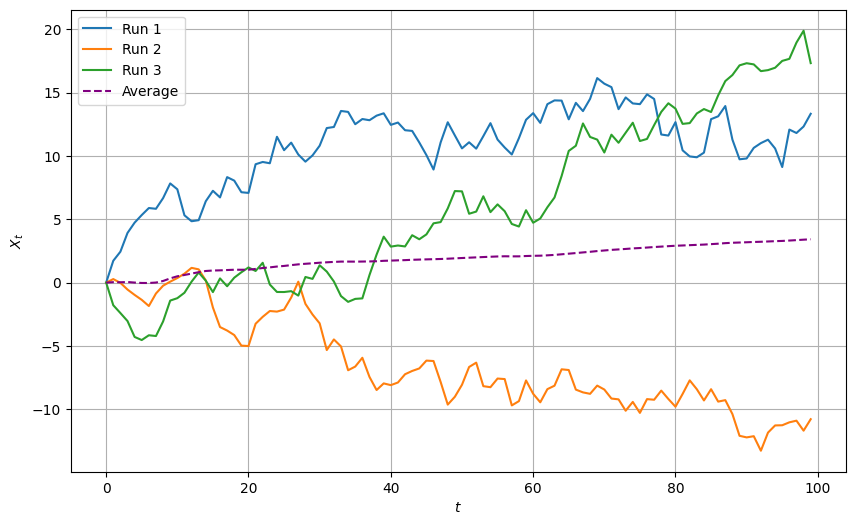

In [ ]:
# Multiple runs

# Define parameters
n = 100  # number of steps
mean = 0  # mean of the white noise series
std_dev = 1  # standard deviation of the white noise series
num_runs = 3 # number of random walk runs

# Generate random walk runs
runs = []
for _ in range(num_runs):
    X = np.zeros(n)
    for t in range(1, n):
        X[t] = X[t - 1] + np.random.normal(mean, std_dev)
    runs.append(X)

# Calculate cumulative average inside each run
cumulative_avgs = []
for run in runs:
    cumulative_avg = np.cumsum(run) / (np.arange(n) + 1)
    cumulative_avgs.append(cumulative_avg)

# Calculate overall cumulative average across all runs
overall_cumulative_avg = np.mean(cumulative_avgs, axis=0)

# Plot all runs and overall cumulative average on the same plot
plt.figure(figsize=(10, 6))
for i in range(num_runs):
    plt.plot(range(n), runs[i], label=f'Run {i+1}')
plt.plot(range(n), overall_cumulative_avg, linestyle='--', color='purple', label='Average')
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.legend()
plt.grid(True)
plt.show()


### 4. KPSS Test for Stationarity

In [ ]:
pip install arch


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from arch.unitroot import KPSS

# Perform KPSS test
kpss_test = KPSS(X)
p_value = kpss_test.pvalue

# Print the results
print(f'KPSS test p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')


KPSS test p-value: 0.110

The time series is stationary (fail to reject "H0: The time series is stationary" at a 5% significance level).


### 5. Case Study: Johnson & Johnson Quarterly Earnings per Share

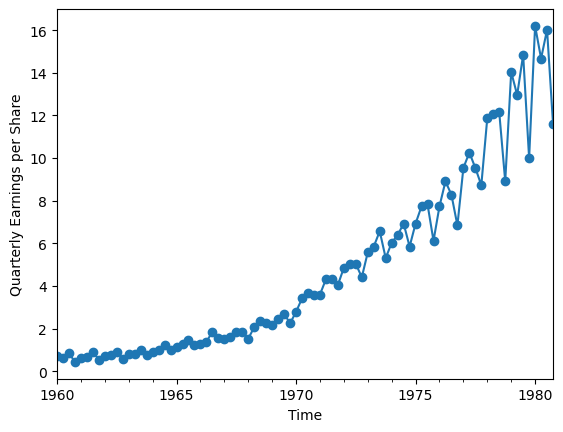

In [ ]:
# Example 1.1: Johnson & Johnson Quarterly Earnings per Share

jj.plot(xlabel='Time', ylabel='Quarterly Earnings per Share', marker='o', legend=False)
plt.show()


In [ ]:
# Perform KPSS test
kpss_test = KPSS(jj)
p_value = kpss_test.pvalue

# Print the results
print(f'KPSS test p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')


KPSS test p-value: 0.000

The time series is not stationary (reject "H0: The time series is stationary" at a 5% significance level).


### 6. Case Study: Southern Oscillation Index & Recruitment

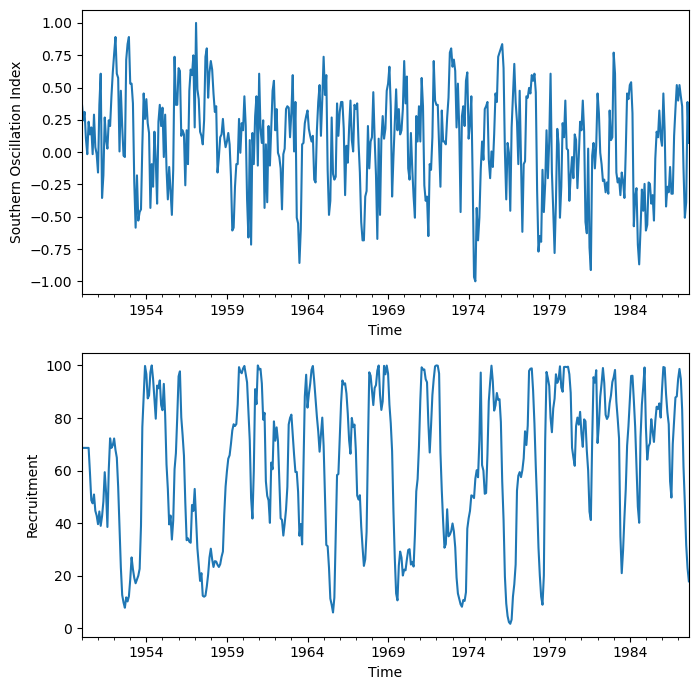

In [ ]:
# Example 1.5: Southern Oscillation Index & Recruitment

fig, axes = plt.subplots(nrows=2, figsize=(7, 7))  # Adjusted figsize

soi.plot(ax=axes[0], xlabel='Time', ylabel='Southern Oscillation Index', legend=False)
rec.plot(ax=axes[1], xlabel='Time', ylabel='Recruitment', legend=False)
fig.tight_layout()
plt.show()


In [ ]:
# Perform KPSS test for soi
kpss_test = KPSS(soi)
p_value = kpss_test.pvalue

# Print the results
bold_start = '\033[1m' # ANSI escape code for bold text
bold_end = '\033[0m'
print(bold_start + 'SOI Time Series: \n' + bold_end)
print(f'KPSS test p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')


# Perform KPSS test for rec
kpss_test = KPSS(rec)
p_value = kpss_test.pvalue

# Print the results
print(bold_start + '\nRecruitment Time Series: \n' + bold_end)
print(f'KPSS test p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')


SOI Time Series: 

KPSS test p-value: 0.014

The time series is not stationary (reject "H0: The time series is stationary" at a 5% significance level).

Recruitment Time Series: 

KPSS test p-value: 0.100

The time series is stationary (fail to reject "H0: The time series is stationary" at a 5% significance level).


## II. Characteristics of Stationary Time Series

### 7. ACF Plot of a Gaussian White Noise Series

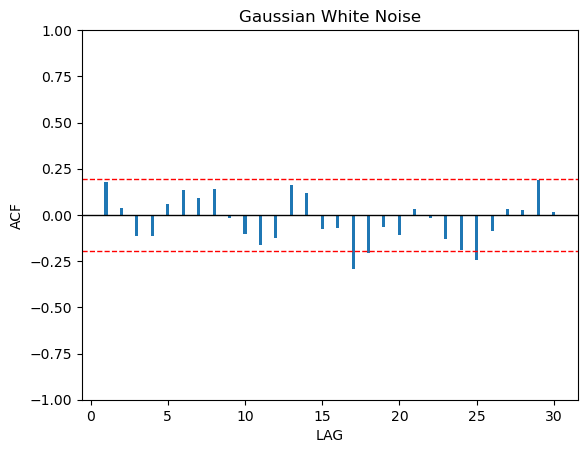

In [ ]:
# Parameters
num_samples = 100
mean = 0
std_dev = 1

# Generate Gaussian white noise series
white_noise = np.random.normal(mean, std_dev, num_samples)

# ACF plot
acf1(white_noise, nlags=30, width=0.2, )

plt.ylim(-1, 1)
plt.title('Gaussian White Noise')
plt.show()


### 8. Case Study: ACF and CCF Plots of a SOI & Recruitment Series¶

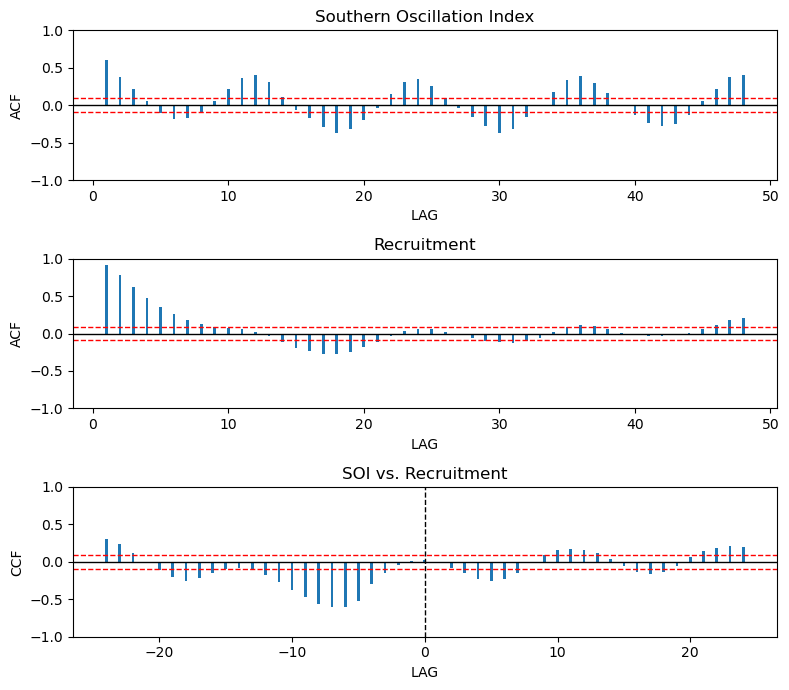

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(8, 7))

acf1(soi, nlags=48, ax=axes[0], width=.2)
axes[0].set_ylim(-1, 1)
axes[0].set_title('Southern Oscillation Index')

acf1(rec, nlags=48, ax=axes[1], width=.2)
axes[1].set_ylim(-1, 1)
axes[1].set_title('Recruitment')

ccf(soi, rec, max_lag=24, ax=axes[2], width=.2)
axes[2].set_ylim(-1, 1)
axes[2].set_title('SOI vs. Recruitment')

fig.tight_layout()
plt.show()


In [ ]:
ccf(soi, rec, max_lag=10, return_values=True)


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.36924573, -0.47605972, -0.55987019, -0.59812273, -0.59870219,
        -0.52701444, -0.29717472, -0.14566556, -0.04170842,  0.01062492,
         0.02495391, -0.01278167, -0.08646848, -0.15374339, -0.22750545,
        -0.25893318, -0.23150664, -0.14380019, -0.01739488,  0.09430847,
         0.15422033]))

In [ ]:
# Create a DataFrame with the relevant columns
df_shifted = pd.DataFrame({
    "soi_t-6": soi.value.shift(6),
    "rec_t": rec.value
}).dropna()

df = pd.DataFrame({
    "soi_t": soi.value,
    "rec_t": rec.value
}).dropna()

print(df[0:9])
print(df_shifted[0:9])


         soi_t  rec_t
index                
1950-01  0.377  68.63
1950-02  0.246  68.63
1950-03  0.311  68.63
1950-04  0.104  68.63
1950-05 -0.016  68.63
1950-06  0.235  68.63
1950-07  0.137  59.16
1950-08  0.191  48.70
1950-09 -0.016  47.54
         soi_t-6  rec_t
index                  
1950-07    0.377  59.16
1950-08    0.246  48.70
1950-09    0.311  47.54
1950-10    0.104  50.91
1950-11   -0.016  44.70
1950-12    0.235  42.85
1951-01    0.137  39.62
1951-02    0.191  44.45
1951-03   -0.016  38.98


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


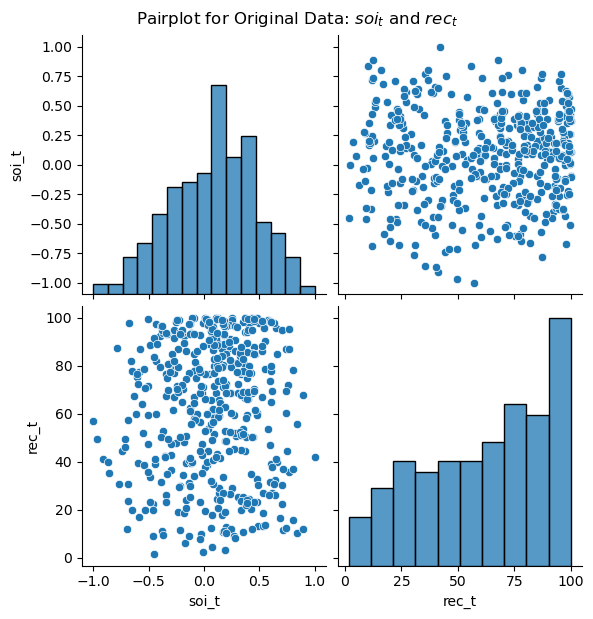

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


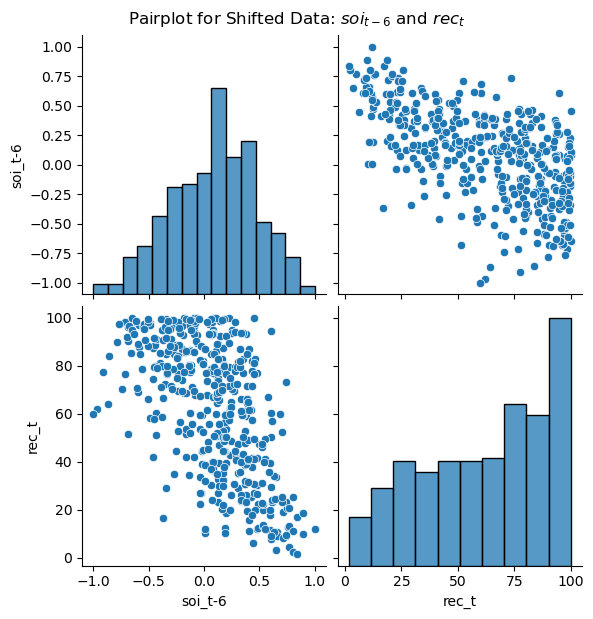

In [ ]:
import seaborn as sns

# Plot the pairplot for the original data (soi_t and rec_t)
sns.pairplot(df, kind="scatter", diag_kind="hist", height=3)
plt.suptitle("Pairplot for Original Data: $soi_{t}$ and $rec_{t}$", y=1.02)
plt.show()

# Plot the pairplot for the shifted data (soi_{t-6} and rec_t)
sns.pairplot(df_shifted, kind="scatter", diag_kind="hist", height=3)
plt.suptitle("Pairplot for Shifted Data: $soi_{t-6}$ and $rec_{t}$", y=1.02)
plt.show()


## III. Assignment Question

- Consider the time series model presented in Bonus Assignment Question on Module 2 lecture slides, Slide 20.

<ol style='list-style-type: lower-roman';>
<li>Generate the time series model from t=0 to t=100 for four different runs. Plot all of them on the same plot along with the cumulative average of the generated data.</li>
<li>Run the KPSS test to check whether the time series generated from the first run in Part (i) is stationary.</li>
